# **Projeto 03 - Case Airbnb**

Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

Professores: Franciane Rodrigues e Jonathas Carneiro

Aluno: Gabriel Henrique Moraes Silva

## Requisitos:


* Pergunta de negócio: Faça uma análise exploratória de dados com a base de dados do Airbnb e indique possíveis oportunidades e/ou ameaças para o empreendimento.

* Nível - Tratamento e Análise
Verificar todos os passos da estratégia geral de análise de dados;
Executar o que for necessário;
Todos os passos devem ser comentados;
Realizar no mínimo 3 análises apenas numéricas;
Realizar plotagens para no mínimo 3 análises;
Chegar a uma conclusão de sua análise;
* Nivel Infra
O Dataset deve ser salvo em ambiente local  (Google Drive) - (bruto e tratado)
O Dataset deve ser salvo em ambiente cloud (Cloud Storage) - (bruto e tratado) (será mostrado em aula!)
* O Arquivo original e tratado deve ser salvo em MongoDB Atlas em coleções diferentes (será mostrado em aula!)

## Legenda de Dados:

* **realSum** - O preço total da lista do Airbnb. (Numérico);

* **room_type** - O tipo de quarto oferecido (por exemplo, quarto privado, quarto compartilhado, casa/apartamento inteiro). (Categórico);

* **room_shared** - Se o quarto é compartilhado ou não. (Booleano);

* **room_private** - Se o quarto é privado ou não. (Booleano);

* **person_capacity** - O número máximo de pessoas que podem ser acomodadas em um único anúncio. (Numérico);

* **host_is_superhost** - Se um determinado anfitrião é identificado como superhost no Airbnb. (Booleano);

* **multi** - Se vários quartos são fornecidos em um único anúncio individual. (Booleano);

* **biz** - Se um determinado anúncio oferece instalações comerciais, como área de reunião/salas de conferência, além das opções de acomodação. (Booleano);

* **cleanliness_rating** - A classificação associada à limpeza de uma propriedade individual após a estadia dos hóspedes. (Numérico);

* **guest_satisfaction_overall** - A classificação geral que mostra o grau de satisfação dos hóspedes com a sua estadia após visitar uma propriedade do Airbnb. (Numérico);

* **bedrooms** - A quantidade total de quartos disponíveis em todas as propriedades de um único ID de hospedagem. (Numérico);

* **dist** - A distância do centro da cidade associada a cada propriedade para aluguel. (A medida pode variar dependendo da escala, por exemplo, quilômetros/milhas etc.);

* **metro_dist** - A distância da estação de metrô associada a cada propriedade para aluguel. (A medida pode variar dependendo da escala, por exemplo, quilômetros/milhas etc.);

* **lng** - A medida de longitude correspondente a cada unidade de aluguel. (Numérico);

* **lat** - A medida de latitude correspondente a cada unidade de aluguel. (Numérico);

* **attr_index** - índice de atração do local do anúncio;

* **attr_index_nom** - índice de atração normalizado do local do anúncio;

* **rest_index** - índice do restaurante do local da listagem;

* **rest_index_nom** -  índice de restaurante normalizado (0-100);


**Fonte de pesquisas:** https://www.kaggle.com/datasets/thedevastator/airbnb-price-determinants-in-europe


### Problema de Negócio Airbnb:

Faça uma análise exploratória de dados com a base de dados do Airbnb e indique possíveis oportunidades e/ou ameaças para o empreendimento.

* Who? (Quem?) - Airbnb

* What? (O quê?) - Achar uma oportunidade ou uma ameaça atual no empreendimento selecionado

* Where? (Onde? base principal) room_type | room_private | room_shared |

* Where? (Onde? sub base) cleanliness_rating | guest_satisfaction_overall | dist | attr_index

* When? (Quando?) Sem uso

* Why? (Por quê?) Ajudar os viajantes a encontrar uma acomodação que satisfaça suas necessidades sem gastar mais do que o necessário

# Instalações e Importações

In [ ]:
# Instalação dos pacotes
!pip install gcsfs
!pip install pandera

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 3.6 MB/s eta 0:00:00


In [ ]:
# Abertura de bibliotecas
import os
import pandas as pd
import numpy as np
import pandera as pa
from google.cloud import storage
import matplotlib.pyplot as plt

In [ ]:
# Estruturação da quantidade de colunas para aparecer no Datraframe
pd.set_option('display.max_columns',100)

# Extração

In [ ]:
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/ferrous-depth-389812-c60aaaf964e3.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket = client.get_bucket('projeto-fundamentosdepython') #nome da bucket
bucket.blob('airbnb (1).csv') # nome do arquivo
path = 'gs://projeto-fundamentosdepython/Projetos/Bruto/airbnb (1).csv' # gsutil aqui

In [ ]:
# Abertura da base de dados e cópia de segurança (bucket)
df = pd.read_csv(path,
                 sep=',',
                 encoding='ISO-8859-1',
                 dayfirst = True)
dfback = df.copy()

# Pré-Analise

In [ ]:
# Visualização do dataframe
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
# Visualização dos tipos de dados do dataframe
df.dtypes

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [ ]:
# Backup 1 do dataframe
dfback1 = df.copy()

# Transformação

o Escolher as possíveis colunas importantes para a análise;

-> Verificar se há colunas iguais;

-> Verificação e tratamento de duplicadas;

-> Verificação e tratamento de valores nulos;

-> Verificação e tratamento de valores (ou observações) únicos;

-> Verificação e tratamento de inconsistência;

-> Tradução/Renomeação;

* Nome das colunas: minúsculo;

* Nome das categorias: maiúsculo;

-> Transformação de tipos adequados dos dados;

* Float;
* Int;
* String;
* Bool;
* Datetime;

In [ ]:
#-> Verificar se há colunas iguais;
if df.columns.duplicated().any():
    print("Existem colunas duplicadas.")
else:
    print("Todas as colunas são únicas.")

Todas as colunas são únicas.


In [ ]:
#-> Verificação de valores nulos;
df.isna().sum()

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

In [ ]:
#-> Verificação e tratamento de valores (ou observações) únicos;
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


## Retirada de colunas com problemas e/ou não utilizadas na analise

In [ ]:
df.drop(['rest_index_norm'],axis=1,inplace=True)


In [ ]:
df.drop(['person_capacity'],axis=1,inplace=True)

In [ ]:
df.drop(['multi'],axis=1,inplace=True)

In [ ]:
df.drop(['biz'],axis=1,inplace=True)

In [ ]:
df.drop(['bedrooms'],axis=1,inplace=True)

In [ ]:
df.drop(['metro_dist', 'lng', 'lat'],axis=1,inplace=True)

In [ ]:
df.drop(['attr_index_norm', 'rest_index'],axis=1,inplace=True)

In [ ]:
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,dist,attr_index
0,0,194.033698,Private room,False,True,False,10.0,93.0,5.022964,78.690379
1,1,344.245776,Private room,False,True,False,8.0,85.0,0.488389,631.176378
2,2,264.101422,Private room,False,True,False,9.0,87.0,5.748312,75.275877
3,3,433.529398,Private room,False,True,False,9.0,90.0,0.384862,493.272534
4,4,485.552926,Private room,False,True,True,10.0,98.0,0.544738,552.830324
...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,False,10.0,100.0,2.375833,181.198355
1099,1099,233.637194,Private room,False,True,False,10.0,90.0,4.719736,108.024880
1100,1100,317.062311,Private room,False,True,False,10.0,92.0,0.598355,440.476515
1101,1101,1812.855904,Entire home/apt,False,False,False,8.0,84.0,1.943020,257.948105


In [ ]:
# Backup local do df com dados do aerodromo
dfback1 = df.copy()

## Renomeando as Colunas

In [ ]:
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,dist,attr_index
0,0,194.033698,Private room,False,True,False,10.0,93.0,5.022964,78.690379
1,1,344.245776,Private room,False,True,False,8.0,85.0,0.488389,631.176378
2,2,264.101422,Private room,False,True,False,9.0,87.0,5.748312,75.275877
3,3,433.529398,Private room,False,True,False,9.0,90.0,0.384862,493.272534
4,4,485.552926,Private room,False,True,True,10.0,98.0,0.544738,552.830324
...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,False,10.0,100.0,2.375833,181.198355
1099,1099,233.637194,Private room,False,True,False,10.0,90.0,4.719736,108.024880
1100,1100,317.062311,Private room,False,True,False,10.0,92.0,0.598355,440.476515
1101,1101,1812.855904,Entire home/apt,False,False,False,8.0,84.0,1.943020,257.948105


In [ ]:
# Renomeando colunas
df.rename(columns={'room_type':'tipos_Quarto',
                   'room_shared':'quarto_compartilhado',
                   'room_private':'quarto_privado',
                   'host_is_superhost':'superhost',
                   'cleanliness_rating': 'nivel_limpeza',
                   'guest_satisfaction_overall': 'satisfação',
                   'dist':'distancia_centro',
                   'attr_index':'indice_satisfação',
},inplace=True)

In [ ]:
df.dtypes

Unnamed: 0                int64
realSum                 float64
tipos_Quarto             object
quarto_compartilhado       bool
quarto_privado             bool
superhost                  bool
nivel_limpeza             int64
satisfação                int64
distancia_centro          int64
indice_satisfação       float64
dtype: object

In [ ]:
# Transformação do tipo de dados
df['nivel_limpeza'] = df['nivel_limpeza'].astype(int)
df['satisfação'] = df['satisfação'].astype(int)


In [ ]:
df.dtypes

Unnamed: 0                int64
realSum                 float64
tipos_Quarto             object
quarto_compartilhado       bool
quarto_privado             bool
superhost                  bool
nivel_limpeza             int64
satisfação                int64
distancia_centro          int64
indice_satisfação       float64
dtype: object

# Qualidade dos Dados

In [ ]:
#INICIAR ETAPA DE QUALIDADE DE DADOS
df.dtypes

Unnamed: 0                int64
realSum                 float64
tipos_Quarto             object
quarto_compartilhado       bool
quarto_privado             bool
superhost                  bool
nivel_limpeza             int64
satisfação                int64
distancia_centro          int64
indice_satisfação       float64
dtype: object

In [ ]:
# Definir o esquema de validação
schema = pa.DataFrameSchema({'tipos_Quarto': pa.Column(pa.String),
                            'quarto_compartilhado': pa.Column(pa.Bool),
                            'quarto_privado': pa.Column(pa.Bool),
                            'superhost': pa.Column(pa.Bool),
                            'nivel_limpeza': pa.Column(pa.Int),
                            'satisfação': pa.Column(pa.Int),
                            'distancia_centro': pa.Column(pa.Int),
                            })

# Validar o DataFrame
schema.validate(df)

#QUARTO COMPARTILHADO = Um quarto cm beliches que podem ser usadas por pessoas diferentes ao mesmo tempo
#QUARTO PRIVADO = Uma reserva de um quarto para dormir, podendo ter banheiro privado ou compartilhado em área comum
#ENTIRE HOME/APT = Casa ou apartamento completo

,Unnamed: 0,realSum,tipos_Quarto,quarto_compartilhado,quarto_privado,superhost,nivel_limpeza,satisfação,distancia_centro,indice_satisfação
0,0,194.033698,Private room,False,True,False,10,93,5,78.690379
1,1,344.245776,Private room,False,True,False,8,85,0,631.176378
2,2,264.101422,Private room,False,True,False,9,87,5,75.275877
3,3,433.529398,Private room,False,True,False,9,90,0,493.272534
4,4,485.552926,Private room,False,True,True,10,98,0,552.830324
...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,False,10,100,2,181.198355
1099,1099,233.637194,Private room,False,True,False,10,90,4,108.024880
1100,1100,317.062311,Private room,False,True,False,10,92,0,440.476515
1101,1101,1812.855904,Entire home/apt,False,False,False,8,84,1,257.948105


# Carregamento

In [ ]:
# Backup 2 do df tratado
dfback2 = df.copy()

In [ ]:
#EXPORTANDO PARA UMA PASTA NO CLOUD

'''df.to_csv('gs:// + (caminho) + / + (nome do arquivo.tipodedados)')'''


# Google Cloud
df.to_csv('gs://projeto-fundamentosdepython/Projetos/Tratado/Airbnb/airbnb_Tratado.csv', index=False) # salva no bucket

# Analises

## Analise de escolha do tipo de acomodação

In [ ]:
df.groupby(['tipos_Quarto']).size()
#Majoridade: PrivateRoom |  2° Lugar: Entire home/apt | 3° Lugar: Shared room
# Podemos identificar o baixo número de ofertas por aluguel de quartos compartilhados e uma disputa acirrada entre o privado e o apt/casa inteira

tipos_Quarto
Entire home/apt    538
Private room       559
Shared room          6
dtype: int64

In [ ]:
total = 1103
apt_home = 538
private_room = 559
shared_room  = 6

resultadoapt_home = ((100 * apt_home) / total)
print(f"{resultadoapt_home:.2f} porcento dos clientes escolhem a acomodação (Entire home/apt)")

resultadopriv = ((100 * private_room) / total)
print(f"{resultadopriv:.2f} porcento dos clientes escolhem a acomodação (Private room)")

resultadoshar = ((100 * shared_room) / total)
print(f"{resultadoshar:.2f} porcento dos clientes escolhem a acomodação (Shared room)")

48.78 porcento dos clientes escolhem a acomodação (Entire home/apt)
50.68 porcento dos clientes escolhem a acomodação (Private room)
0.54 porcento dos clientes escolhem a acomodação (Shared room)


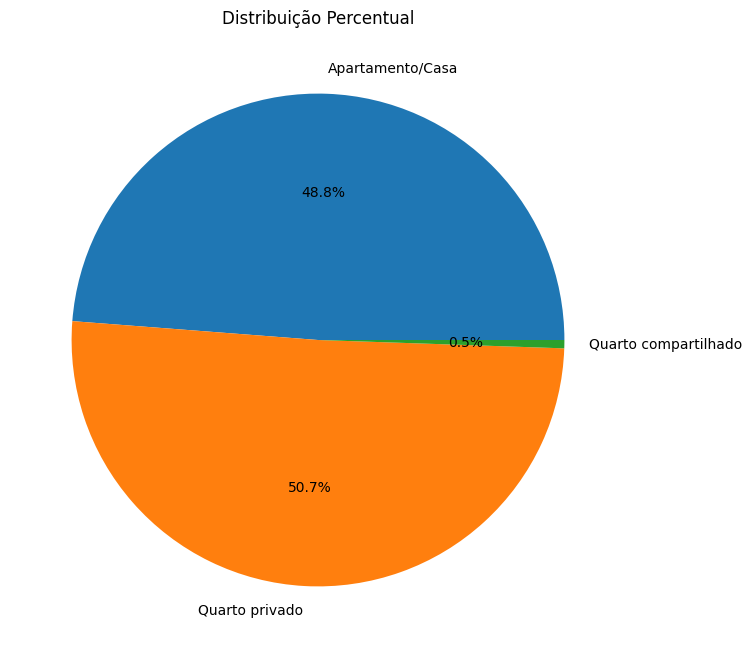

In [ ]:
# Dados fictícios para exemplo
acomodacoes = ['Apartamento/Casa', 'Quarto privado', 'Quarto compartilhado']
percentuais = [48.78, 50.68, 0.54]  # Percentuais correspondentes às variáveis

# Criar o gráfico de pizza
plt.pie(percentuais, labels=acomodacoes, autopct='%1.1f%%')

# Configurar título
plt.title('Distribuição Percentual')

# Exibir o gráfico
plt.show()


## Analise dos tipos de quartos por nivel de satisfação

In [ ]:
df.groupby(['tipos_Quarto']).size()

tipos_Quarto
Entire home/apt    538
Private room       559
Shared room          6
dtype: int64

In [ ]:
# Definindo quantidade de superhost por tipo de quarto
df.groupby('tipos_Quarto')['superhost'].sum().sort_values(ascending=False).head()

tipos_Quarto
Private room       207
Entire home/apt    114
Shared room          2
Name: superhost, dtype: int64

In [ ]:
#Fazendo correlação com satisfação por esquema de 5 estrelas, 5 equivale a avaliação 81-100 | 4 equivale a avaliação 61-80
#3 equivale a avaliação 41-60 | 2 equivale a avaliação 21-40 | 1 equivale a avaliação 0-20

#Quantos tipos de quarto alugados tem o indice de satisfação acima de 81 a 100.
result = df[df['satisfação'].between(81,100)].sort_values('tipos_Quarto').groupby('tipos_Quarto').size()

print(result)


tipos_Quarto
Entire home/apt    522
Private room       535
Shared room          6
dtype: int64


In [ ]:
#Quantos tipos de quarto alugados tem o indice de satisfação acima de 61 a 80.
result2 = df[df['satisfação'].between(61,80)].sort_values('tipos_Quarto').groupby('tipos_Quarto').size()

print(result2)

tipos_Quarto
Entire home/apt    15
Private room       20
dtype: int64


In [ ]:
#Quantos tipos de quarto alugados tem o indice de satisfação acima de 41 a 60.
result3 = df[df['satisfação'].between(41,60)].sort_values('tipos_Quarto').groupby('tipos_Quarto').size()

print(result3)

tipos_Quarto
Entire home/apt    1
Private room       3
dtype: int64


In [ ]:
#Quantos tipos de quarto alugados tem o indice de satisfação acima de 21 a 40.
result4 = df[df['satisfação'].between(21,40)].sort_values('tipos_Quarto').groupby('tipos_Quarto').size()

print(result4)

Series([], dtype: int64)


In [ ]:
#Quantos tipos de quarto alugados tem o indice de satisfação acima de 0 a 20.
result5 = df[df['satisfação'].between(0,20)].sort_values('tipos_Quarto').groupby('tipos_Quarto').size()

print(result5)

tipos_Quarto
Private room    1
dtype: int64


- Analise:
Identificamos que, com base ao nivel de satisfação, fica legivel que, todos os quartos compartilhados alugados constam com nivel de satisfação acima de 70.  

## Analise dos tipos de quartos por nivel de satisfação da limpeza

In [ ]:
df.groupby(['tipos_Quarto']).size()

tipos_Quarto
Entire home/apt    538
Private room       559
Shared room          6
dtype: int64

In [ ]:
df.groupby(['nivel_limpeza']).size()

nivel_limpeza
4       2
5       1
6       9
7      11
8      87
9     334
10    659
dtype: int64

In [ ]:
#Quantos tipos de quarto alugados tem o indice de satisfação por limpeza entre 1 a 5
result_limpz = df[df['nivel_limpeza'].between(1,5)].sort_values('tipos_Quarto').groupby('tipos_Quarto').size()

print(result_limpz)

tipos_Quarto
Private room    3
dtype: int64


In [ ]:
#Quantos tipos de quarto alugados tem o indice de satisfação por limpeza entre 6 e 8.
result_limpz = df[df['nivel_limpeza'].between(6,8)].sort_values('tipos_Quarto').groupby('tipos_Quarto').size()

print(result_limpz)

tipos_Quarto
Entire home/apt    57
Private room       48
Shared room         2
dtype: int64


In [ ]:
#Quantos tipos de quarto alugados tem o indice de satisfação por limpeza entre 9 e 10
result_limpz2 = df[df['nivel_limpeza'].between(9,10)].sort_values('tipos_Quarto').groupby('tipos_Quarto').size()

print(result_limpz2)

tipos_Quarto
Entire home/apt    481
Private room       508
Shared room          4
dtype: int64


In [ ]:
# Entire home/apt:

total = 538
indice_alto = 481
indice_baixo = 57

resultado = ((100 * indice_alto) / total)
print(f"{resultado:.2f} porcento de avaliações entre 9 e 10")


resultado2 = ((100 * indice_baixo) / total)
print(f"{resultado2:.2f} porcento de avaliações entre 6 e 8")


89.41 porcento de avaliações entre 9 e 10
10.59 porcento de avaliações entre 6 e 8


In [ ]:
# Private room:

total = 559
indice_alto = 508
indice_baixo = 48

resultado = ((100 * indice_alto) / total)
print(f"{resultado:.2f} porcento de avaliações entre 9 e 10")


resultado2 = ((100 * indice_baixo) / total)
print(f"{resultado2:.2f} porcento de avaliações entre 6 e 8")



90.88 porcento de avaliações entre 9 e 10
8.59 porcento de avaliações entre 6 e 8


In [ ]:
# Shared room

total = 6
indice_alto = 4
indice_baixo = 2

resultado = ((100 * indice_alto) / total)
print(f"{resultado:.2f} porcento de avaliações entre 9 e 10")


resultado2 = ((100 * indice_baixo) / total)
print(f"{resultado2:.2f} porcento de avaliações entre 6 e 8")

66.67 porcento de avaliações entre 9 e 10
33.33 porcento de avaliações entre 6 e 8


- Analise:

Identificamos que o nivel de satisfação por limpeza existente é entre o indice 1 até 10, fica legivel que entre os quartos privados e apt/casa inteira o indice de satisfação por limpeza é acima de 89%, em contrapartida, os quartos compartilhados tem o indice de satisfação acima de 65%.

Fazendo uma analise breve entre os indices de satisfações analisados até agora, podemos verificar que, apesar do indice de limpeza dos quartos compartilhados estarem abaixo, é totalmente normal esse índice, visto que, esse tipo de quarto são divididos com diversas pessoas, o que pode ocasionar de fato algum mal entendido, desavença entre clientes com relação a limpeza do ambiente alugado.

## Analise dos tipos de quartos por distância do centro

In [ ]:
df

,Unnamed: 0,realSum,tipos_Quarto,quarto_compartilhado,quarto_privado,superhost,nivel_limpeza,satisfação,distancia_centro,indice_satisfação
0,0,194.033698,Private room,False,True,False,10,93,5,78.690379
1,1,344.245776,Private room,False,True,False,8,85,0,631.176378
2,2,264.101422,Private room,False,True,False,9,87,5,75.275877
3,3,433.529398,Private room,False,True,False,9,90,0,493.272534
4,4,485.552926,Private room,False,True,True,10,98,0,552.830324
...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,False,10,100,2,181.198355
1099,1099,233.637194,Private room,False,True,False,10,90,4,108.024880
1100,1100,317.062311,Private room,False,True,False,10,92,0,440.476515
1101,1101,1812.855904,Entire home/apt,False,False,False,8,84,1,257.948105


In [ ]:
df.groupby(['tipos_Quarto']).size()

tipos_Quarto
Entire home/apt    538
Private room       559
Shared room          6
dtype: int64

In [ ]:
#Identificação de quantos quartos por km de distãncia do centro do local alugado
df.groupby(['distancia_centro']).size()

distancia_centro
0     180
1     270
2     245
3     189
4      81
5      33
6      33
7      33
8      15
9       9
10     12
11      3
dtype: int64

In [ ]:
#Quantos tipos de quarto alugados foram escolhidos com base da sua distancia ao centro local
result_limpz2 = df[df['distancia_centro'].between(0,3)].sort_values('tipos_Quarto').groupby('tipos_Quarto').size()

print(result_limpz2)

tipos_Quarto
Entire home/apt    467
Private room       413
Shared room          4
dtype: int64


In [ ]:
#Quantos tipos de quarto alugados foram escolhidos com base da sua distancia ao centro local
result_limpz2 = df[df['distancia_centro'].between(4,7)].sort_values('tipos_Quarto').groupby('tipos_Quarto').size()

print(result_limpz2)

tipos_Quarto
Entire home/apt     63
Private room       116
Shared room          1
dtype: int64


In [ ]:
#Quantos tipos de quarto alugados foram escolhidos com base da sua distancia ao centro local
result_limpz2 = df[df['distancia_centro'].between(8,11)].sort_values('tipos_Quarto').groupby('tipos_Quarto').size()

print(result_limpz2)

tipos_Quarto
Entire home/apt     8
Private room       30
Shared room         1
dtype: int64


In [ ]:
# Entire home/apt:

total = 538
distancia_curta = 467
distancia_media = 63
distancia_alta = 8

resultado = ((100 * distancia_curta) / total)
print(f"{resultado:.2f} porcento de Entire home/apt alugados a até 3km de distância do centro")


resultado2 = ((100 * distancia_media) / total)
print(f"{resultado2:.2f} porcento de Entire home/apt alugados entre 4km a até 7km de distância do centro")

resultado3 = ((100 * distancia_alta) / total)
print(f"{resultado3:.2f} porcento de Entire home/apt alugados acima de 8km de distância do centro")



86.80 porcento de Entire home/apt alugados a até 3km de distância do centro
11.71 porcento de Entire home/apt alugados entre 4km a até 7km de distância do centro
1.49 porcento de Entire home/apt alugados acima de 8km de distância do centro


In [ ]:
# Private room:

total = 559
distancia_curta = 413
distancia_media = 116
distancia_alta = 30

resultado = ((100 * distancia_curta) / total)
print(f"{resultado:.2f} porcento de Private room alugados a até 3km de distância do centro")


resultado2 = ((100 * distancia_media) / total)
print(f"{resultado2:.2f} porcento de Private room alugados entre 4km a até 7km de distância do centro")

resultado3 = ((100 * distancia_alta) / total)
print(f"{resultado3:.2f} porcento de Private room alugados acima de 8km de distância do centro")

73.88 porcento de Private room alugados a até 3km de distância do centro
20.75 porcento de Private room alugados entre 4km a até 7km de distância do centro
5.37 porcento de Private room alugados acima de 8km de distância do centro


In [ ]:
# shared room:

total = 6
distancia_curta = 4
distancia_media = 1
distancia_alta = 1

resultado = ((100 * distancia_curta) / total)
print(f"{resultado:.2f} porcento de shared room alugados a até 3km de distância do centro")


resultado2 = ((100 * distancia_media) / total)
print(f"{resultado2:.2f} porcento de shared room alugados entre 4km a até 7km de distância do centro")

resultado3 = ((100 * distancia_alta) / total)
print(f"{resultado3:.2f} porcento de shared room alugados acima de 8km de distância do centro")

66.67 porcento de shared room alugados a até 3km de distância do centro
16.67 porcento de shared room alugados entre 4km a até 7km de distância do centro
16.67 porcento de shared room alugados acima de 8km de distância do centro


## Analise de Correlações

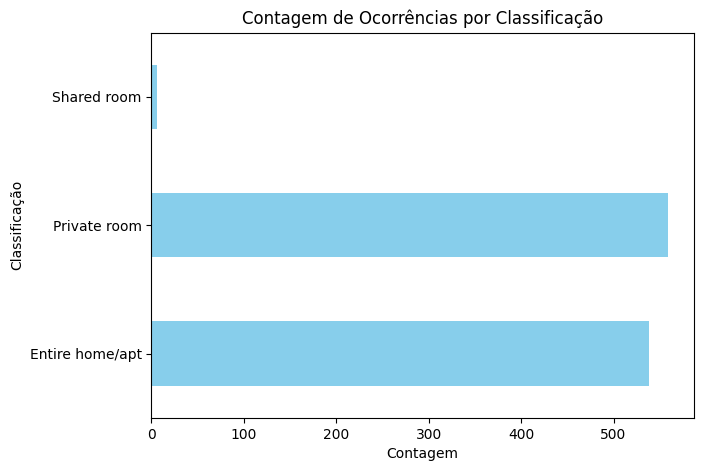

In [ ]:
df.groupby(['tipos_Quarto']).size().plot.barh(figsize=(7,5), color=['skyblue'])
plt.xlabel('Contagem')
plt.ylabel('Classificação')
plt.title('Contagem de Ocorrências por Classificação')
plt.show()

In [ ]:
df.groupby(['tipos_Quarto']).size()

tipos_Quarto
Entire home/apt    538
Private room       559
Shared room          6
dtype: int64

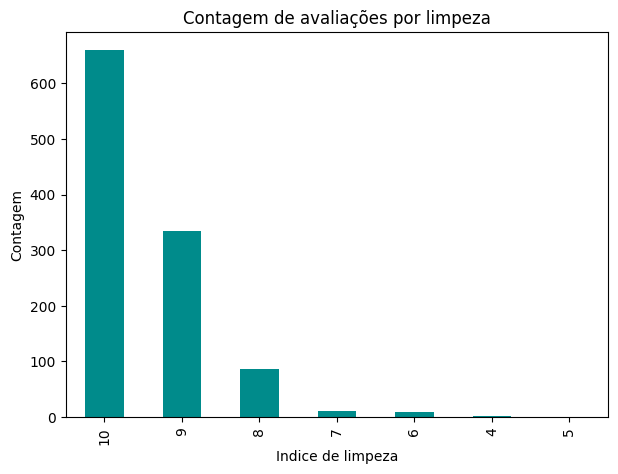

In [ ]:
df.groupby('nivel_limpeza').size().sort_values(ascending=False).plot.bar(figsize=(7,5), color=['DarkCyan'])
plt.xlabel('Indice de limpeza')
plt.ylabel('Contagem')
plt.title('Contagem de avaliações por limpeza')
plt.show()

In [ ]:
df.corr()

<ipython-input-108-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,realSum,quarto_compartilhado,quarto_privado,superhost,nivel_limpeza,satisfação,distancia_centro,indice_satisfação
Unnamed: 0,1.000000,-0.022390,0.024814,-0.021909,-0.023852,-0.022184,-0.031362,-0.013408,-0.048963
realSum,-0.022390,1.000000,-0.046853,-0.433549,-0.063118,0.022938,0.136025,-0.263896,0.244193
quarto_compartilhado,0.024814,-0.046853,1.000000,-0.074968,0.006581,-0.027327,-0.018581,0.039707,-0.008128
quarto_privado,-0.021909,-0.433549,-0.074968,1.000000,0.172563,0.031909,-0.133384,0.105414,0.004953
superhost,-0.023852,-0.063118,0.006581,0.172563,1.000000,0.314499,0.299440,0.011144,-0.023030
nivel_limpeza,-0.022184,0.022938,-0.027327,0.031909,0.314499,1.000000,0.648809,-0.017794,-0.006147
satisfação,-0.031362,0.136025,-0.018581,-0.133384,0.299440,0.648809,1.000000,-0.056603,0.006316
distancia_centro,-0.013408,-0.263896,0.039707,0.105414,0.011144,-0.017794,-0.056603,1.000000,-0.691942
indice_satisfação,-0.048963,0.244193,-0.008128,0.004953,-0.023030,-0.006147,0.006316,-0.691942,1.000000


<ipython-input-109-d5f741f32f6e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True)


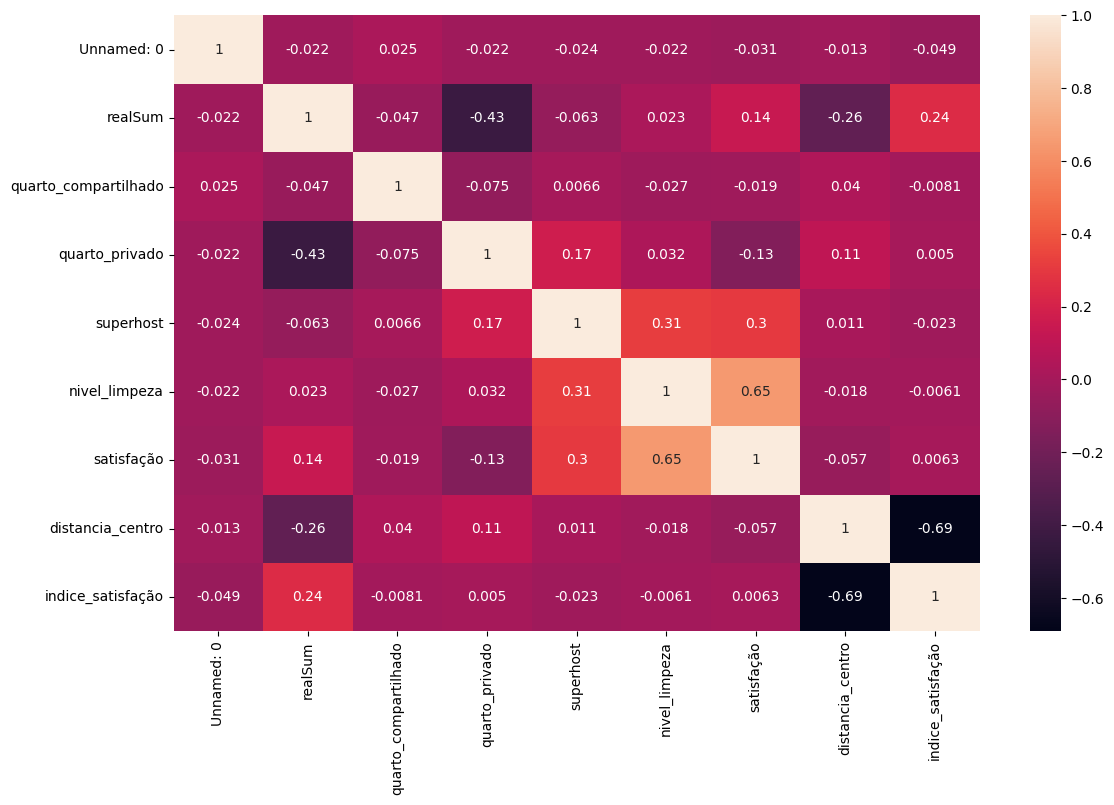

In [ ]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (13,8)
ax = sns.heatmap(df.corr(), annot=True)

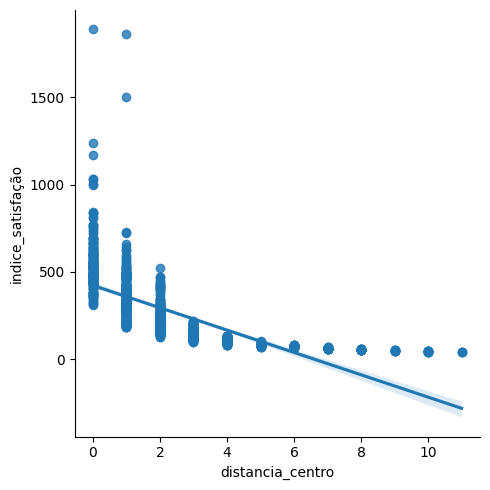

In [ ]:
#Identificamos uma leve correlação da satisfação da região e de sua distancia ate o local alugado
sns.lmplot(x = "distancia_centro", y = "indice_satisfação", data = df);

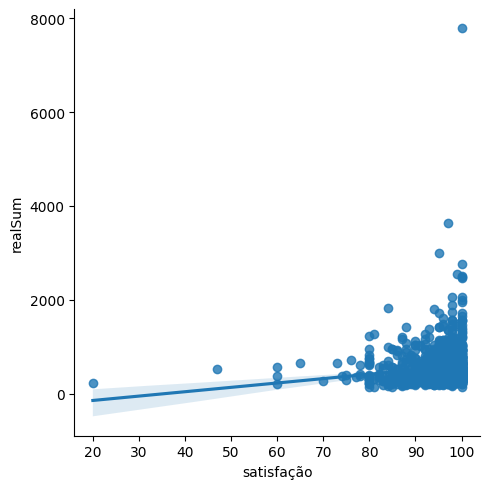

In [ ]:
sns.lmplot(x = "satisfação", y = "realSum", data = df);

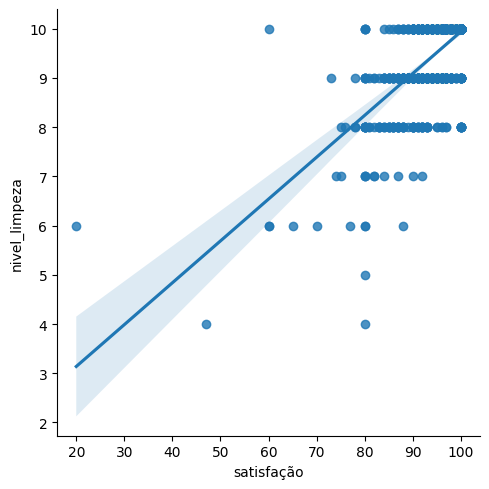

In [ ]:
sns.lmplot(x = "satisfação", y = "nivel_limpeza", data = df);

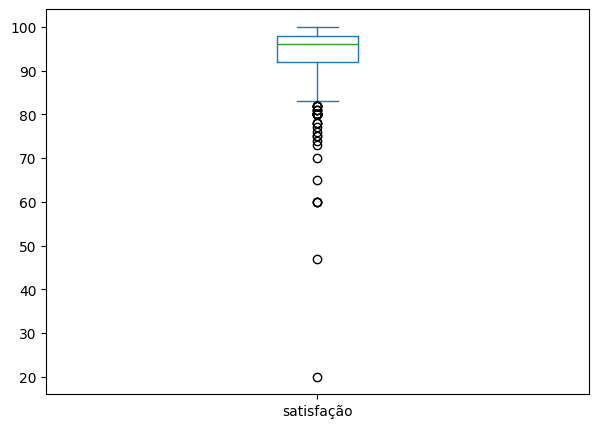

In [ ]:
# Boxplot da coluna satisfação onde idenficamos o registro padrão entre os indices 100-75 mas que abaixo disso podemos identificar um número significativo de outliers.
df.plot.box(column="satisfação", figsize=(7, 5))
plt.show()

In [ ]:
!pip install pygwalker -q
import pygwalker as pyg

In [ ]:
pyg.walk(df) # Analisar tipos_Quartos x realSum x nive_limpeza |

Output hidden; open in https://colab.research.google.com to view.

# Conclusão

- Após uma análise detalhada, foram identificados os seguintes pontos:

  - Predominância dos aluguéis de quartos privados e apartamentos/casas completas: Cerca de 48,78% dos clientes preferem apartamentos/casas completas, enquanto 50,68% preferem quartos privados.

  - Nível de satisfação por limpeza: Observou-se que o nível de satisfação em relação à limpeza varia de 1 a 10. Os quartos privados e apartamentos/casas completas têm um índice de satisfação acima de 89%, enquanto os quartos compartilhados têm um índice de satisfação a partir de 65%.

  - Distância das acomodações ao centro da cidade: Verificou-se que todas as três modalidades de quartos estão, em sua maioria, localizadas próximas aos centros da cidade. Isso contribui para avaliações positivas e conforto dos clientes.

  Considerando os índices de satisfação analisados até o momento, pode-se observar que, apesar do índice de limpeza dos quartos compartilhados ser mais baixo, isso é compreensível, uma vez que esse tipo de quarto é compartilhado com várias pessoas, o que pode ocasionar eventuais divergências e desentendimentos em relação à limpeza do ambiente alugado.



Possivel Oportunidades: Baseado nos dados trabalhados, recomendo que o time de marketing faça um levantamento dos clientes que usam dos quartos compartilhados, o que dizem e suas pretensões. Conforme dados retirados do O Globo, existe uma alta no mercado relacionado aos Nomades digitais, tendo inclusive o lançamento de vistos para essas pessoas que costumam não ter um local fixo e ficam viajando entre hosteis e locais de quartos compartilhados.

link: https://oglobo.globo.com/mundo/noticia/2023/06/home-office-na-europa-paises-criam-incentivos-para-nomades-digitais-com-renda.ghtml
